In [15]:
import h5py
import numpy 
import pylab as mplot
%pylab inline
import astropy.io.fits as pf
import healpy as hp

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/global/common/software/lsst/gitlab/desc-python-prod/76008/py/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


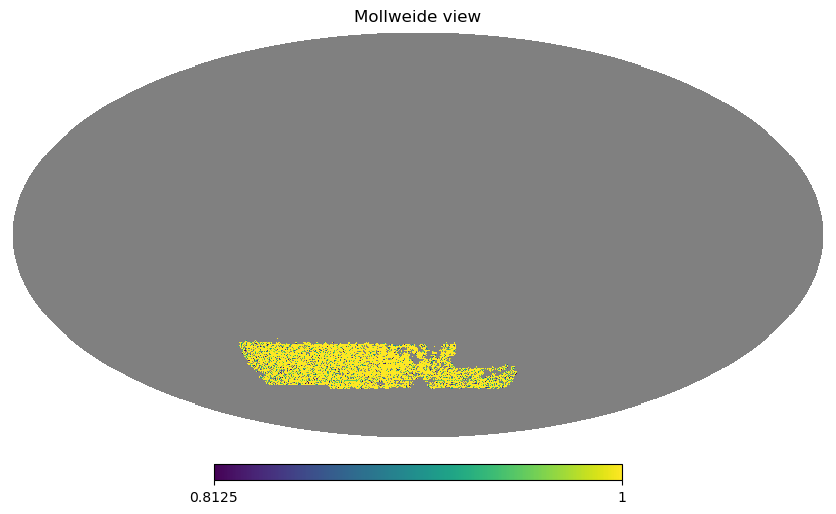

In [16]:
mask = hp.read_map('../inputs/DES_Y1A1_3x2pt_redMaGiC_MASK_HPIX4096RING.fits')
hp.mollview(mask)

mask_512 = hp.ud_grade(mask, 512)

In [17]:
pixel = np.arange(len(mask_512))

# not_nan = (mask_512>0)
# pixel = pixel[not_nan]
# mask_512 = mask_512[not_nan]

In [18]:
with h5py.File('../inputs/mask_desy1.h5', 'w') as f:

    f.create_group("provenance")
    f.create_group("maps")
    f.create_group("maps/mask")

    f['maps/mask/pixel'] = pixel.copy()
    f['maps/mask/value'] = mask_512.copy()


In [14]:
with h5py.File('../inputs/mask_desy1.h5') as f:
    print(f['maps/mask'].keys())


<KeysViewHDF5 ['pixel', 'value']>
